# Prerequisit

In [1]:
from sklearn.datasets import fetch_california_housing
import sklearn
import numpy as np
import pandas as pd  

# ML
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel

## import your models
from sklearn import svm
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Visualizations
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Functions

In [2]:
# model evaluation for training set
def show_results(actual_data, predictions, actual_labels):
    
    rmse = (np.sqrt(mean_squared_error(actual_labels, predictions)))
    r2 = r2_score(actual_labels, predictions)

    print("The model performance for this set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")
    
    
def plot_feature_importance(feature_importance, mod_name):
    
    fig, ax = plt.subplots(1,1, figsize=(10,6)) 
    ax.set_xticks(range(len(feature_importance['Feature'])))
    ax.set_xticklabels(feature_importance['Feature'].values, rotation='vertical', fontsize=12)
    #ax.set_yticklabels(np.arange(min(feature_importance['Coef']),max(feature_importance['Coef']), 0.01), fontsize=12)
    sns.barplot(x="Feature", y="Coef", data=feature_importance)
    plt.tight_layout()
#     plt.savefig('boston_figures/feature_importance_' + mod_name + '.png')
    plt.show()
    
def visualize_model_output(y_actual, y_predict, mod_name):
    results = pd.DataFrame(np.c_[y_actual, y_predict], columns=['prices', 'predicted_prices'])
    ax = sns.regplot(x="prices", y="predicted_prices", data=results, color='darkblue')
    plt.title("Prices vs {}-Predicted prices".format(mod_name))

    # comparison of the actual and predicted value
    df1 = results.head(20)
    df1.plot(kind='bar',figsize=(10,6))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.tight_layout()
#     plt.savefig('boston_figures/' + mod_name + '_output.png')
    plt.show()
    
def minmax_data_v0(df):
    """
    This function minmax normalize the given dataset
    input: a dataframe
    output: minmax normalized set
    """
    # keep the norm dataset separet as the actual dataset
    norm_df = df.copy()
    if 1 == len(df.shape): # if its a series and not a dataframe
        norm_df =  ((df-df.min())/(df.max()-df.min()))
           
    else: # if its a dataframe         
        for col in df.columns:
            norm_df[col] = ((df[col]-df[col].min())
                            /(df[col].max()-df[col].min()))
          
    return norm_df


def minmax_data_v1(train_df, test_df):
    """
    This function minmax normalize the train and test datasets using train min and max 
    input: train and test dataframes 
    output: minmax normalized train and test set minmaxed by train set min and mx value
    """
    # keep the norm dataset separet as the actual dataset
    norm_train_df = train_df.copy()
    norm_test_df  = test_df.copy()    
    if 1 == len(train_df.shape): # if its a series and not a dataframe
        norm_test_df =  ((test_df-train_df.min())
                      /(train_df.max()-train_df.min()))
        
        norm_train_df =  ((train_df-train_df.min())
                      /(train_df.max()-train_df.min()))            
    else: # if its a dataframe         
        for col in train_df.columns:
            norm_test_df[col] = ((test_df[col]-train_df[col].min())
                          /(train_df[col].max()-train_df[col].min()))

            norm_train_df[col] = ((train_df[col]-train_df[col].min())
                          /(train_df[col].max()-train_df[col].min()))
          
    return norm_train_df, norm_test_df, train_df.min(), train_df.max()

def zscore_normalize(train_df, test_df):
    """
    this function retur 2 normalized dataframes normalizied by train set info
    input: train and test dataframes
    output: z-score normalized dataframes
    """
    
    norm_train_df = train_df.copy()
    norm_test_df  = test_df.copy()    
    if 1 == len(train_df.shape): # if its a series and not a dataframe
        norm_test_df = test_df.transform(
            lambda x: (x - train_df.mean()) / train_df.std())
        norm_train_df = train_df.transform(
            lambda x: (x - train_df.mean()) / train_df.std())
        
    else: # if its a dataframe         
        for col in train_df.columns:
            norm_test_df[col] =  test_df[col].transform(
                lambda x: (x - train_df[col].mean()) / train_df[col].std())
            norm_train_df[col] =  train_df[col].transform(
                lambda x: (x - train_df[col].mean()) / train_df[col].std())

    return norm_train_df, norm_test_df

def plot_feature_importances_v2(model):
    plt.figure(figsize=(8,6))
    n_features = len(norm_train_x.columns)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), norm_train_x.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


## Parameter Iitialization

In [3]:
# Initialize Parameters
describe_boston   = False
normalize_data    = True 

# For DL Model
eval_split = 10
hold_out_size = 0.2

lr = 0.0001
optimizer = 'rmsprop'
units = 4
r_activation = 'tanh'
activation = 'tanh'
recurrent_activation = 'hard_sigmoid'
dropout = 0.2
loss_function = 'mse'

batchSize = 64
epochs = 50
verbose = 1

#earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

# opt = None
# if (optimizer is 'sgd'):
#     opt = optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
        
# elif(optimizer is 'rmsprop'):
#     opt = optimizers.RMSprop(lr=lr, rho=0.9, epsilon=1e-08, decay=0.0)
    
# elif(optimizer is 'adam'):
#     opt = optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.01)

## Explore California Dataset

In [4]:
california_data = fetch_california_housing()
print(california_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [5]:
data = pd.DataFrame(california_data.data, columns=california_data.feature_names)
data['MEDV'] = california_data.target # price of the houses
data.describe().T.round(2)

count     mean      std     min     25%      50%      75%  \
MedInc      20640.0     3.87     1.90    0.50    2.56     3.53     4.74   
HouseAge    20640.0    28.64    12.59    1.00   18.00    29.00    37.00   
AveRooms    20640.0     5.43     2.47    0.85    4.44     5.23     6.05   
AveBedrms   20640.0     1.10     0.47    0.33    1.01     1.05     1.10   
Population  20640.0  1425.48  1132.46    3.00  787.00  1166.00  1725.00   
AveOccup    20640.0     3.07    10.39    0.69    2.43     2.82     3.28   
Latitude    20640.0    35.63     2.14   32.54   33.93    34.26    37.71   
Longitude   20640.0  -119.57     2.00 -124.35 -121.80  -118.49  -118.01   
MEDV        20640.0     2.07     1.15    0.15    1.20     1.80     2.65   

                 max  
MedInc         15.00  
HouseAge       52.00  
AveRooms      141.91  
AveBedrms      34.07  
Population  35682.00  
AveOccup     1243.33  
Latitude       41.95  
Longitude    -114.31  
MEDV            5.00

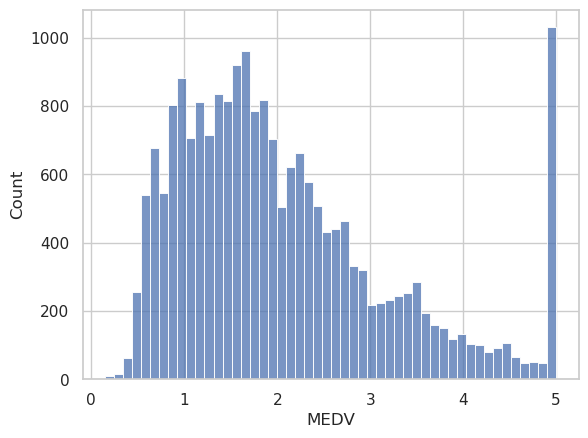

In [6]:
sns.set(style=('whitegrid'))
sns.histplot(data['MEDV'], bins=50)
#sns.distplot(data['MEDV'], bins=50)
plt.show()

<Axes: >

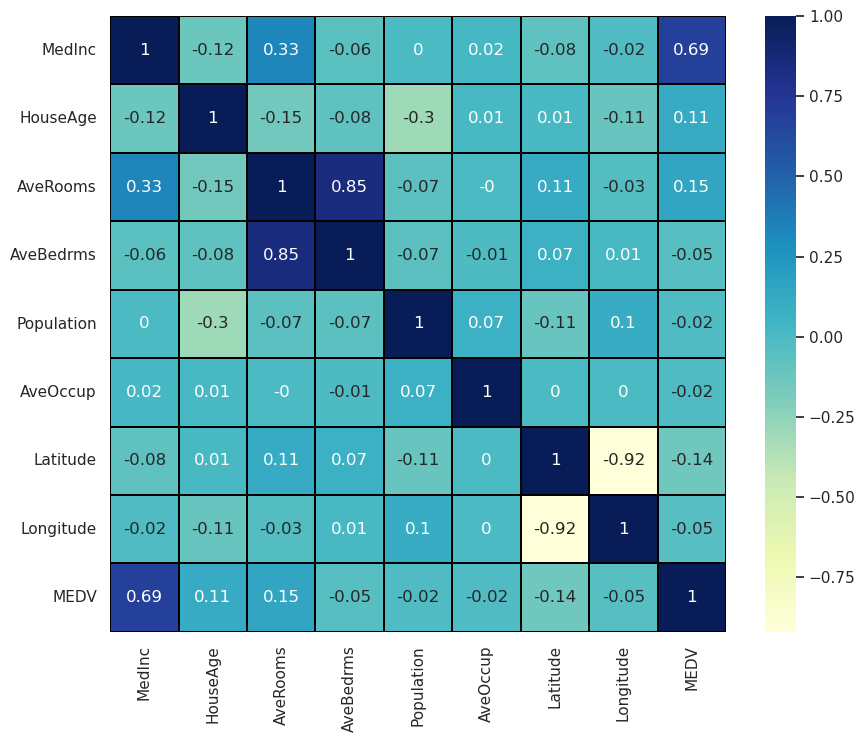

In [7]:
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(10,8))
sns.heatmap(data=correlation_matrix, linewidths=0.25, square=True, 
            linecolor='black', vmax=1.0, cmap="YlGnBu", annot=True)

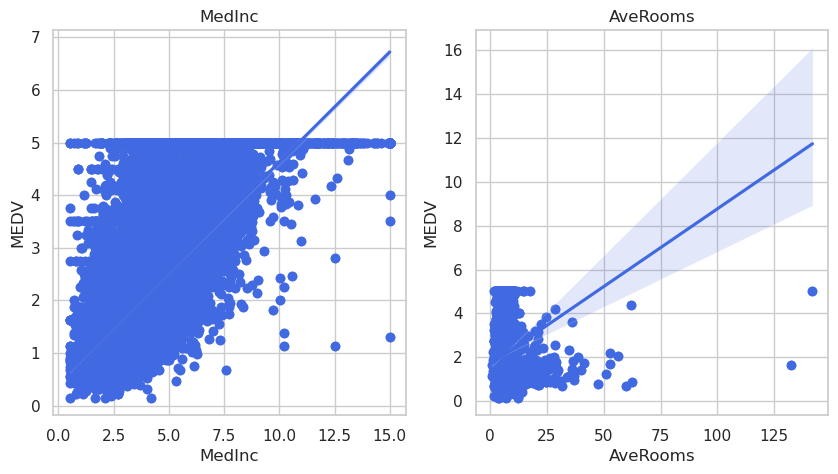

In [8]:
plt.figure(figsize=(10, 5))
features = ['MedInc', 'AveRooms']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o', c='royalblue')
    sns.regplot(x=x, y=y, data=data, color='royalblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [9]:
# preprocess data
min_max = True
standard_scale = False
normalize_target = True

X = data.loc[:, data.columns != 'MEDV'].copy()
Y = data['MEDV']

# to select features from a tree
reg = ExtraTreesRegressor(n_estimators=5)
reg = reg.fit(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = hold_out_size, random_state=5)

if standard_scale:
    X_train, X_test = zscore_normalize(X_train, X_test)
elif min_max:
    X_train, X_test, train_min, train_max = minmax_data_v1(X_train, X_test)

if normalize_target and min_max:
    y_train, y_test, y_train_min, y_train_max = minmax_data_v1(y_train, y_test)
if normalize_target and standard_scale:
    y_train, y_test = zscore_normalize(y_train, y_test)


pipe_svr = Pipeline([
    ('feature_selection', SelectFromModel(reg, prefit=False)),
    ('svr', SVR())])
pipe_lr = Pipeline([
    ('feature_selection', SelectFromModel(reg, prefit=False)),
    ('lr', LinearRegression())])
pipe_mlp = Pipeline([
    ('feature_selection', SelectFromModel(reg, prefit=False)),
    ('mlp', MLPRegressor())])
pipe_dt = Pipeline([
    ('feature_selection', SelectFromModel(reg, prefit=False)),
    ('dt', DecisionTreeRegressor())])
pipe_knn = Pipeline([
    ('feature_selection', SelectFromModel(reg, prefit=False)),
    ('knn', KNeighborsRegressor())])

pipelines = [pipe_svr, pipe_lr, pipe_mlp, pipe_dt, pipe_knn]
pipe_dict = {0: 'SVR', 1: 'LinearRegression', 2: 'MLP', 3: 'DecisionTreeRegressor', 4: 'KNeighborsRegressor',}
             #5: 'DeepNeuralNetworks'}

# Fit the pipelines
for pipe in pipelines: pipe.fit(X_train, y_train)
#cv = KFold(n_splits=10, shuffle=True, random_state=1)

# Compare RMSE
for idx, pipe in enumerate(pipelines):
    print('%s pipeline test RMSE: %.3f' % (pipe_dict[idx],
                                           np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))
                                          )
         )

SVR pipeline test RMSE: 0.173
LinearRegression pipeline test RMSE: 0.174
MLP pipeline test RMSE: 0.171
DecisionTreeRegressor pipeline test RMSE: 0.217
KNeighborsRegressor pipeline test RMSE: 0.154


In [10]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)
print('min and max price in trainset:', y_train.min(), y_train.max())
print('min and max price in testset:', y_test.min(), y_test.max())

X_train.shape:  (16512, 8)
X_test.shape:  (4128, 8)
y_train.shape:  (16512,)
y_test.shape:  (4128,)
min and max price in trainset: 0.0 1.0
min and max price in testset: 0.0 1.0


In [11]:
norm_train_x, norm_test_x, train_min, train_max = minmax_data_v1(X_train, X_test)
norm_train_y, norm_test_y, y_train_min, y_train_max = minmax_data_v1(y_train, y_test)

znorm_train_x, znorm_test_x = zscore_normalize(X_train, X_test)
znorm_train_y, znorm_test_y = zscore_normalize(y_train, y_test)

## XAI Techniques
### Interpretable Models
#### Linear regression

In [12]:
lin_model = LinearRegression()
lin_model.fit(norm_train_x, y_train) #norm_train_y

LinearRegression()

In [13]:
lr_y_train_predict = lin_model.predict(norm_train_x)
show_results(norm_test_x, lr_y_train_predict, y_train) #norm_train_y

lr_y_test_predict = lin_model.predict(norm_test_x)
show_results(norm_test_x, lr_y_test_predict, y_test) #norm_test_y

The model performance for this set
--------------------------------------
RMSE is 0.1488876895329811
R2 score is 0.6047922425924859


The model performance for this set
--------------------------------------
RMSE is 0.1510002511799497
R2 score is 0.6112568432827635




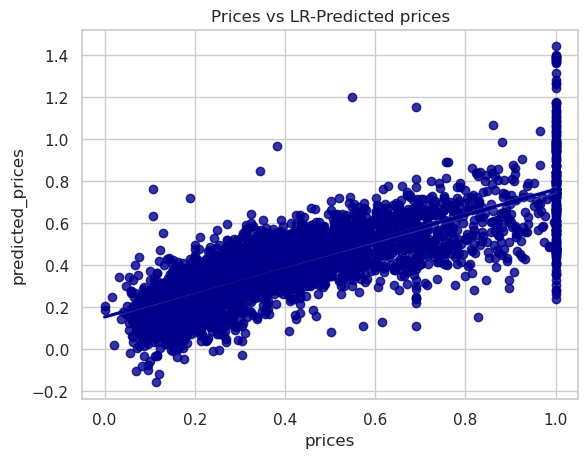

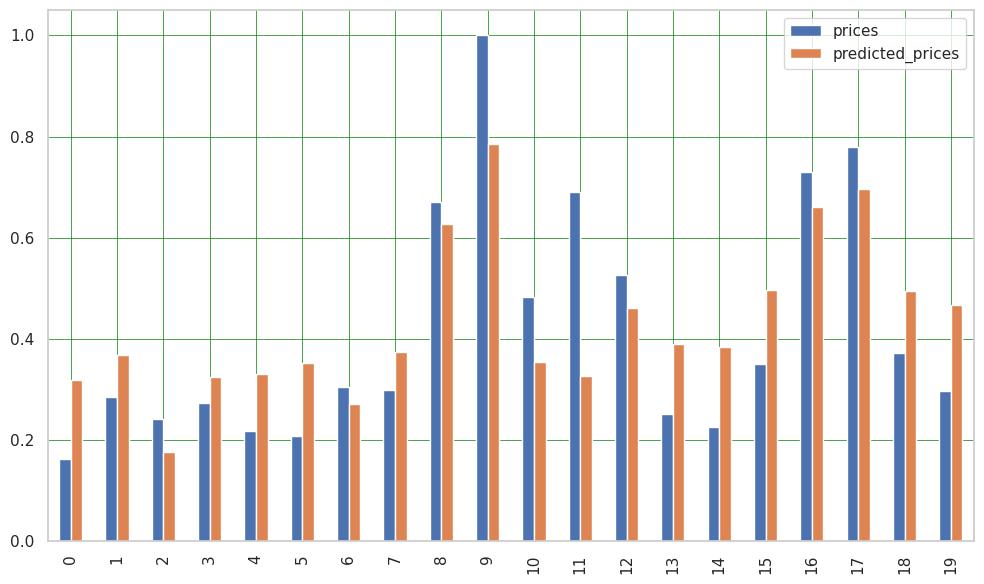

In [14]:
visualize_model_output(y_test, lr_y_test_predict, 'LR') #norm_test_y

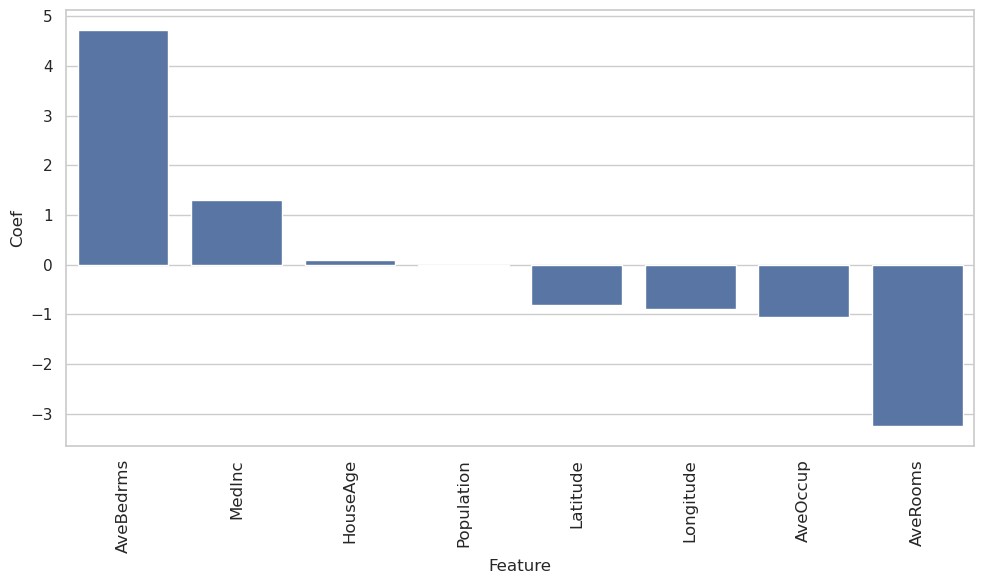

In [15]:
# Coef of the variables
feature_coefs = pd.DataFrame(columns=['Feature', 'Coef'])
feature_coefs['Feature'] = X.columns
feature_coefs['Coef'] = lin_model.coef_

feature_coefs = feature_coefs.sort_values('Coef', ascending=[False])
plot_feature_importance(feature_coefs, 'LR')

#### Decision Tree

In [16]:
tree = DecisionTreeRegressor(random_state=0, max_depth=5)
selected = norm_train_x.columns
tree.fit(norm_train_x[selected], y_train) #norm_train_y

DecisionTreeRegressor(max_depth=5, random_state=0)

In [18]:
from sklearn.tree import export_graphviz
import graphviz

In [19]:
!conda install -c conda-forge python-graphviz -y

Channels:
 - conda-forge
 - defaults
 - nvidia
 - rapidsai
 - pytorch
 - xformers
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    certifi-2026.1.4           |     pyhd8ed1ab_0         147 KB  conda-forge
    cuda-python-12.6.2         |  py310h521d3fa_2         6.1 MB  conda-forge
    cudf-25.08.00              |cuda12_py310_250806_6cea3743         2.1 MB  rapidsai
    libcudf-25.08.00           |cuda12_250806_6cea3743       325.1 MB  rapidsai
    libgcc-15.2.0              |      he0feb66_18        1017 KB  conda-forge
    libgcc-ng-15.2.0           |      h69a702a_18          27 KB  conda-forge
    libgomp-15.2.

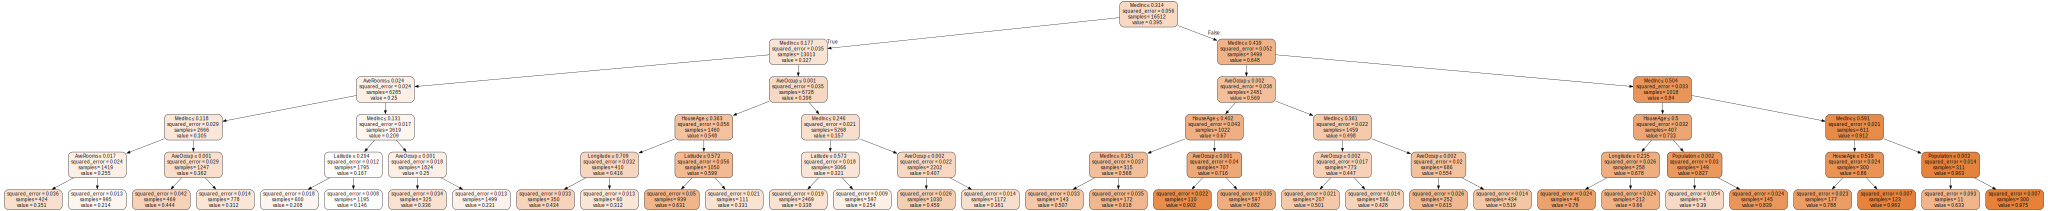

In [19]:
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, 
                                        feature_names=norm_train_x[selected].columns, 
                                        class_names=norm_train_x[selected].columns, 
                                        filled=True, rounded=True, 
                                        special_characters=True)

graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('dtree_render_dimreduct')
graph

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def show_results_regression(y_true, y_pred, title="Model performance"):
    y_true = np.asarray(y_true).reshape(-1)
    y_pred = np.asarray(y_pred).reshape(-1)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    print(title)
    print("-" * len(title))
    print(f"RMSE: {rmse:.5f}")
    print(f"MAE : {mae:.5f}")
    print(f"R²  : {r2:.5f}")

    # Residual diagnostics
    resid = y_true - y_pred

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))

    ax[0].scatter(y_pred, resid, s=10)
    ax[0].axhline(0, linewidth=1)
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Residual (true - pred)")
    ax[0].set_title("Residuals vs Predictions")

    ax[1].hist(resid, bins=30)
    ax[1].set_title("Residual Distribution")
    ax[1].set_xlabel("Residual")
    ax[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

    return rmse, mae, r2

Decision Tree (train)
---------------------
RMSE: 0.14410
MAE : 0.10488
R²  : 0.62978


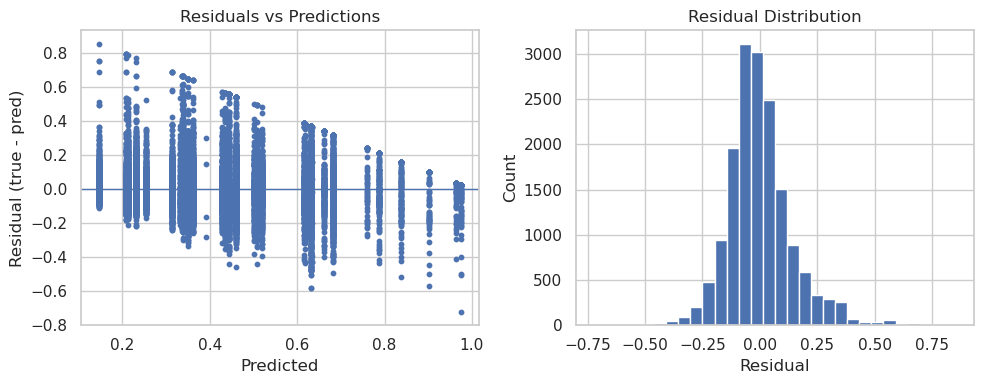

Decision Tree (test)
--------------------
RMSE: 0.14730
MAE : 0.10667
R²  : 0.63010


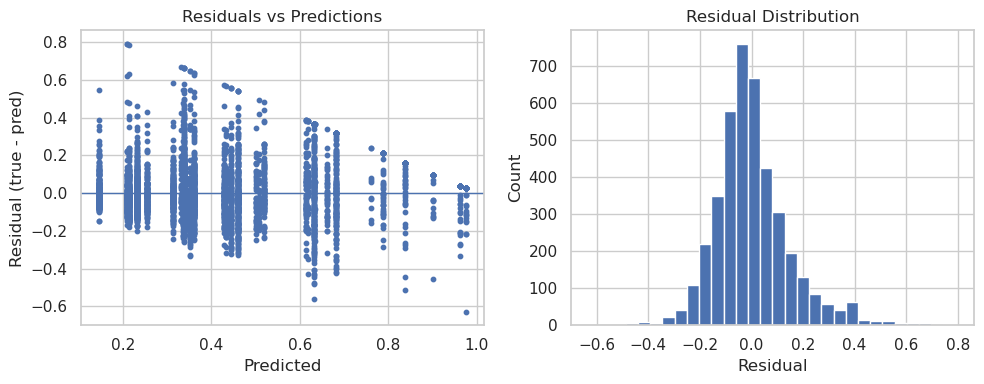

(0.1472961355262566, 0.10666838529744116, 0.6300950669272194)

In [21]:
dt_y_train_pred = tree.predict(norm_train_x)
show_results_regression(y_train, dt_y_train_pred, title="Decision Tree (train)")

dt_y_test_pred = tree.predict(norm_test_x)
show_results_regression(y_test, dt_y_test_pred, title="Decision Tree (test)")

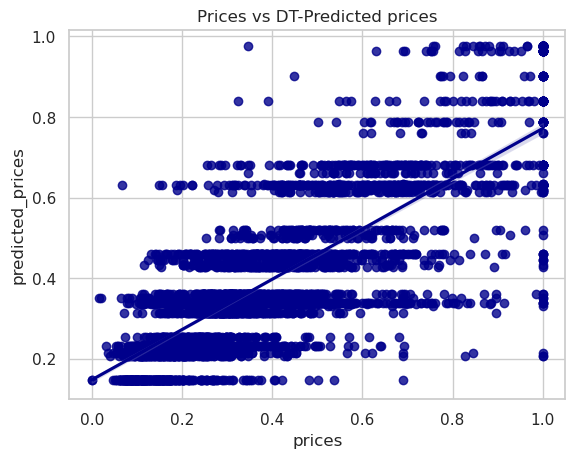

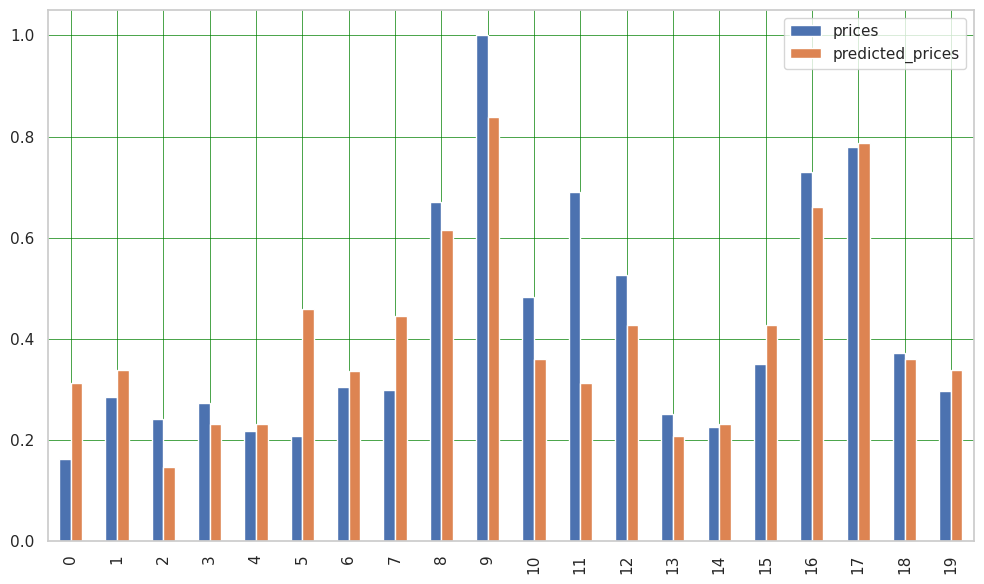

In [24]:
visualize_model_output(y_test, dt_y_test_pred, 'DT') #norm_test_y

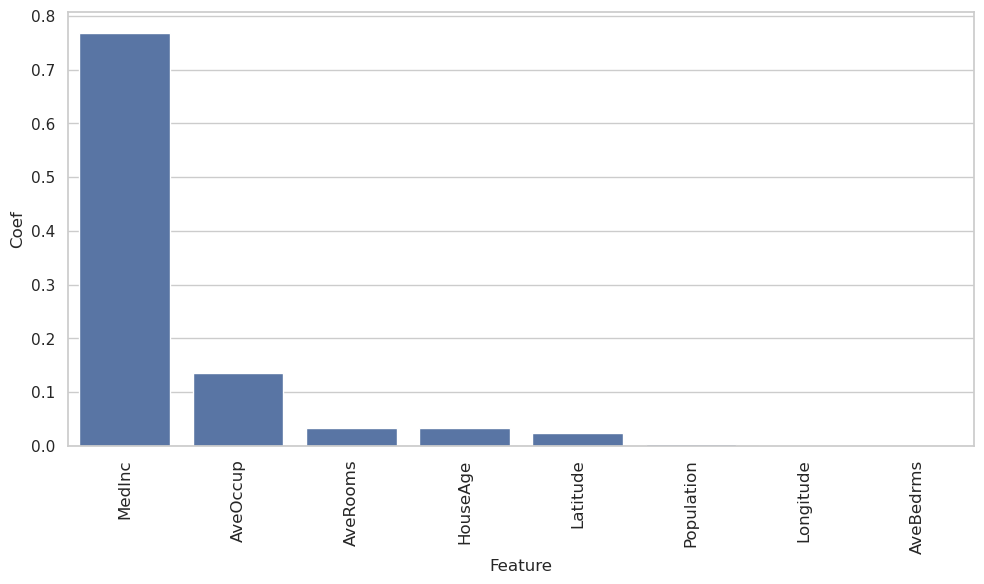

In [22]:
# Coef of the variables
feature_coefs = pd.DataFrame(columns=['Feature', 'Coef'])
feature_coefs['Feature'] = X.columns
feature_coefs['Coef'] = tree.feature_importances_

feature_coefs = feature_coefs.sort_values('Coef', ascending=[False])
plot_feature_importance(feature_coefs, 'DT')

### Black-Boxes

In [23]:
svr = pipelines[0]

SVR (train)
-----------
RMSE: 0.17116
MAE : 0.12455
R²  : 0.47773


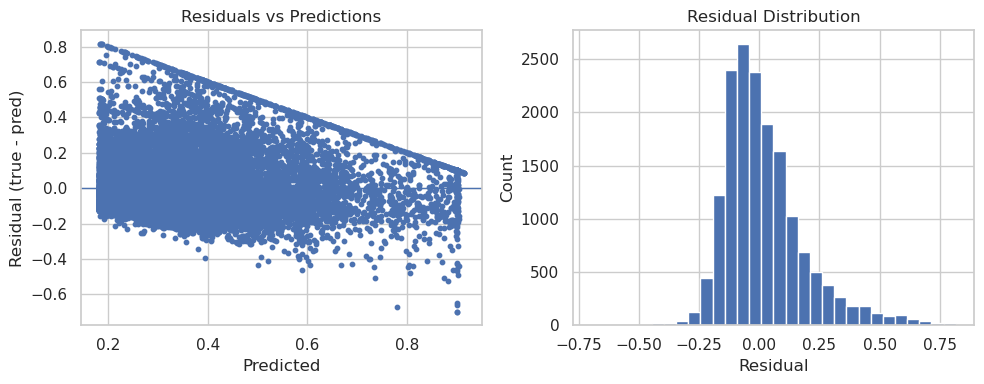

SVR (test)
----------
RMSE: 0.17251
MAE : 0.12540
R²  : 0.49262


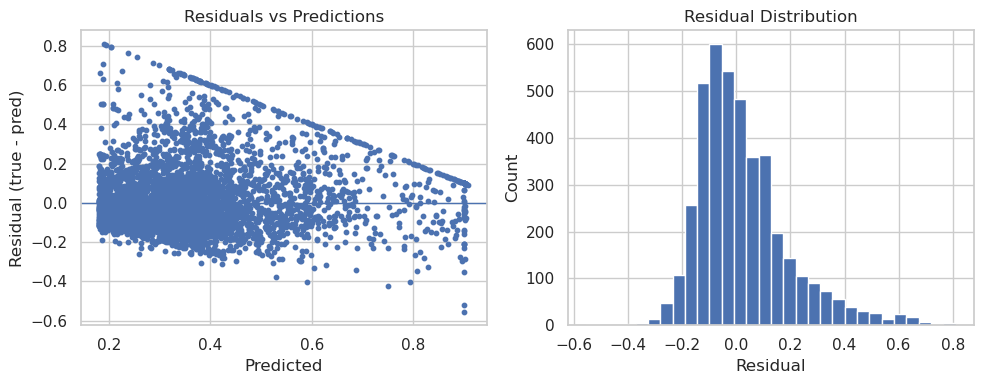

(0.1725095151547294, 0.12539558729539335, 0.49261978674546436)

In [24]:
svr_y_train_pred = svr.predict(norm_train_x)
show_results_regression(y_train, svr_y_train_pred, title="SVR (train)")

svr_y_test_pred = svr.predict(norm_test_x)
show_results_regression(y_test, svr_y_test_pred, title="SVR (test)")

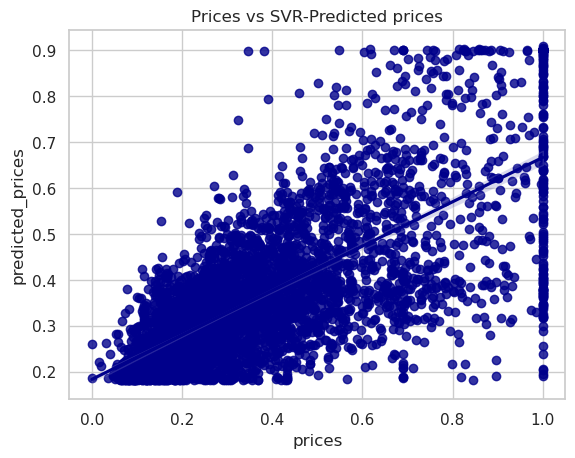

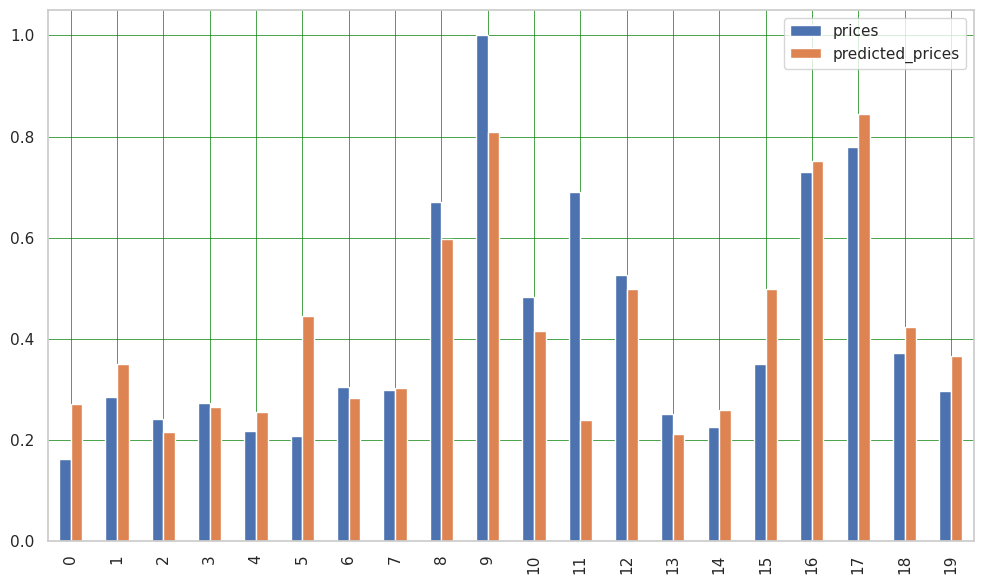

In [25]:
visualize_model_output(y_test, svr_y_test_pred, 'SVR') #norm_test_y#

### Neural Network

In [26]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader



In [27]:
def train_mlp_with_history(
    norm_train_x,
    y_train,
    eval_split=10,
    lr=1e-4,
    optimizer_name="adam",
    weight_decay=0.01,
    batch_size=64,
    epochs=300,
    patience=10,
    verbose=1,
    seed=42,
):
    """
    Training loop in PyTorch that returns (model, history),
    where history mimics mlp_history.history in Keras.

    Validation split matches your original code:
      val = first eval_split samples, train = remaining samples.
    """

    # Reproducibility (optional)
    torch.manual_seed(seed)
    np.random.seed(seed)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    if verbose:
        print("Device:", device)

    # -------------------------
    # Data prep
    # -------------------------
    X_all = np.asarray(norm_train_x, dtype=np.float32)
    y_all = np.asarray(y_train, dtype=np.float32).reshape(-1, 1)

    if X_all.ndim != 2:
        raise ValueError(f"Expected X to be 2D, got shape {X_all.shape}")
    if X_all.shape[0] != y_all.shape[0]:
        raise ValueError(f"X and y must have same length: {X_all.shape[0]} vs {y_all.shape[0]}")
    if eval_split <= 0 or eval_split >= X_all.shape[0]:
        raise ValueError(f"eval_split must be in [1, N-1], got {eval_split} for N={X_all.shape[0]}")

    X_val, y_val = X_all[:eval_split], y_all[:eval_split]
    X_train, y_train_ = X_all[eval_split:], y_all[eval_split:]

    X_train_t = torch.from_numpy(X_train)
    y_train_t = torch.from_numpy(y_train_)
    X_val_t = torch.from_numpy(X_val)
    y_val_t = torch.from_numpy(y_val)

    train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(TensorDataset(X_val_t, y_val_t), batch_size=batch_size, shuffle=False)

    # -------------------------
    # Model: 8 -> 128 -> 64 -> 1
    # -------------------------
    class MLPRegressor(nn.Module):
        def __init__(self, in_dim):
            super().__init__()
            self.net = nn.Sequential(
                nn.Linear(in_dim, 128),
                nn.ReLU(),
                nn.Linear(128, 64),
                nn.ReLU(),
                nn.Linear(64, 1),
            )

        def forward(self, x):
            return self.net(x)

    model = MLPRegressor(in_dim=X_all.shape[1]).to(device)

    # -------------------------
    # Loss + Optimizer
    # -------------------------
    criterion = nn.MSELoss()

    optimizer_name = optimizer_name.lower()
    if optimizer_name == "adam":
        opt = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name == "sgd":
        opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9, nesterov=True, weight_decay=1e-6)
    elif optimizer_name == "rmsprop":
        opt = torch.optim.RMSprop(model.parameters(), lr=lr, alpha=0.9, eps=1e-8, weight_decay=0.0)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")

    # MAE metric
    def mae_metric(y_pred, y_true):
        return torch.mean(torch.abs(y_pred - y_true))

    # -------------------------
    # History 
    # -------------------------
    history = {"loss": [], "mae": [], "val_loss": [], "val_mae": []}

    # -------------------------
    # Early stopping
    # -------------------------
    best_val = float("inf")
    best_state = None
    bad_epochs = 0

    # -------------------------
    # Training loop
    # -------------------------
    for epoch in range(1, epochs + 1):
        # ---- train ----
        model.train()
        train_losses, train_maes = [], []

        for xb, yb in train_loader:
            xb = xb.to(device)
            yb = yb.to(device)

            opt.zero_grad()
            pred = model(xb)
            loss = criterion(pred, yb)
            loss.backward()
            opt.step()

            train_losses.append(loss.item())
            train_maes.append(mae_metric(pred.detach(), yb).item())

        # ---- validate ----
        model.eval()
        val_losses, val_maes = [], []
        with torch.no_grad():
            for xb, yb in val_loader:
                xb = xb.to(device)
                yb = yb.to(device)
                pred = model(xb)

                vloss = criterion(pred, yb)
                val_losses.append(vloss.item())
                val_maes.append(mae_metric(pred, yb).item())

        tr_loss = float(np.mean(train_losses)) if train_losses else np.nan
        tr_mae  = float(np.mean(train_maes)) if train_maes else np.nan
        va_loss = float(np.mean(val_losses)) if val_losses else np.nan
        va_mae  = float(np.mean(val_maes)) if val_maes else np.nan

        # Record history
        history["loss"].append(tr_loss)
        history["mae"].append(tr_mae)
        history["val_loss"].append(va_loss)
        history["val_mae"].append(va_mae)

        if verbose:
            print(f"Epoch {epoch:3d}/{epochs} | "
                  f"loss: {tr_loss:.4f} mae: {tr_mae:.4f} | "
                  f"val_loss: {va_loss:.4f} val_mae: {va_mae:.4f}")

        # ---- early stopping on val_loss ----
        if va_loss < best_val - 1e-12:
            best_val = va_loss
            best_state = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
            bad_epochs = 0
        else:
            bad_epochs += 1
            if bad_epochs >= patience:
                if verbose:
                    print(f"Early stopping triggered (patience={patience}). Best val_loss={best_val:.6f}")
                break

    # Restore best weights
    if best_state is not None:
        model.load_state_dict(best_state)

    return model, history, device


# -------------------------
# USAGE 
# -------------------------
model, history, device = train_mlp_with_history(
    norm_train_x=norm_train_x,
    y_train=y_train,
    eval_split=10,
    lr=1e-4,
    optimizer_name="adam",
    batch_size=64,
    epochs=300,
    patience=10,
    verbose=1,
)

# Predict 
with torch.no_grad():
    X_all = torch.as_tensor(np.asarray(norm_train_x, dtype=np.float32), device=device)
    y_pred_train = model(X_all).cpu().numpy().reshape(-1)

Device: cuda
Epoch   1/300 | loss: 0.1434 mae: 0.2909 | val_loss: 0.0243 val_mae: 0.1425
Epoch   2/300 | loss: 0.0493 mae: 0.1734 | val_loss: 0.0234 val_mae: 0.1412
Epoch   3/300 | loss: 0.0413 mae: 0.1591 | val_loss: 0.0200 val_mae: 0.1297
Epoch   4/300 | loss: 0.0345 mae: 0.1439 | val_loss: 0.0195 val_mae: 0.1237
Epoch   5/300 | loss: 0.0303 mae: 0.1337 | val_loss: 0.0163 val_mae: 0.1134
Epoch   6/300 | loss: 0.0281 mae: 0.1274 | val_loss: 0.0168 val_mae: 0.1120
Epoch   7/300 | loss: 0.0271 mae: 0.1245 | val_loss: 0.0159 val_mae: 0.1086
Epoch   8/300 | loss: 0.0266 mae: 0.1232 | val_loss: 0.0153 val_mae: 0.1066
Epoch   9/300 | loss: 0.0264 mae: 0.1226 | val_loss: 0.0161 val_mae: 0.1081
Epoch  10/300 | loss: 0.0262 mae: 0.1220 | val_loss: 0.0158 val_mae: 0.1073
Epoch  11/300 | loss: 0.0260 mae: 0.1213 | val_loss: 0.0146 val_mae: 0.1038
Epoch  12/300 | loss: 0.0260 mae: 0.1213 | val_loss: 0.0151 val_mae: 0.1054
Epoch  13/300 | loss: 0.0258 mae: 0.1208 | val_loss: 0.0144 val_mae: 0.1025

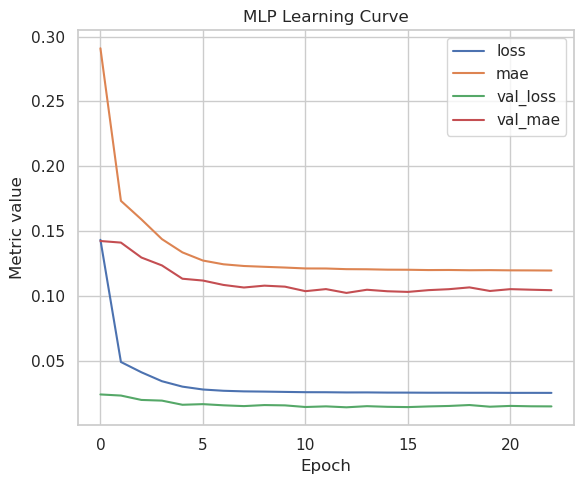

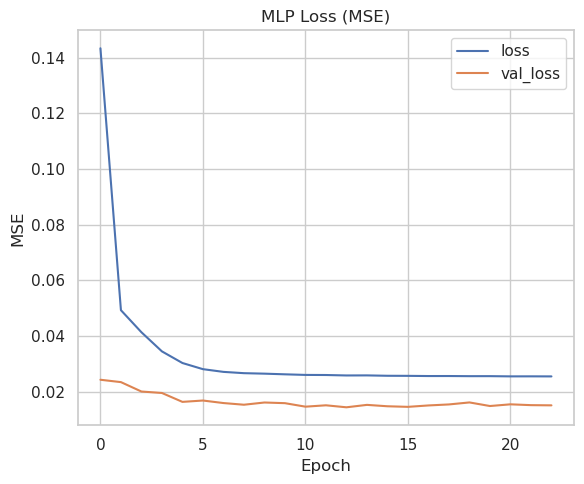

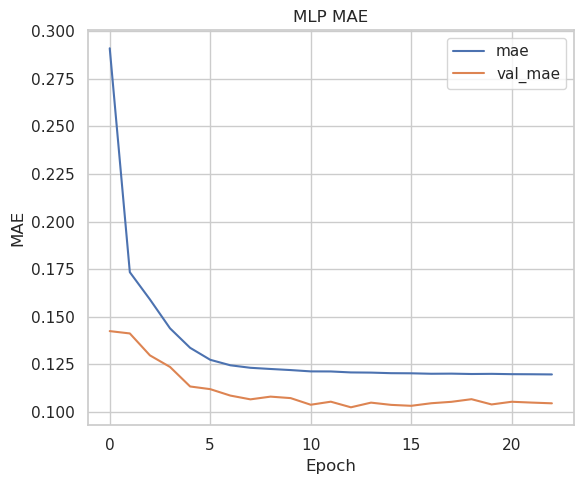

In [28]:
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)

ax.set_title("MLP Learning Curve")

for label in sorted(history.keys()):  # ['loss','mae','val_loss','val_mae'] (sorted)
    ax.plot(history[label], label=label)

ax.set_xlabel("Epoch")
ax.set_ylabel("Metric value")
ax.legend()
plt.tight_layout()
plt.show()


# --- separate plots: loss + mae ---
plt.figure(figsize=(6, 5))
plt.plot(history["loss"], label="loss")
plt.plot(history["val_loss"], label="val_loss")
plt.title("MLP Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.plot(history["mae"], label="mae")
plt.plot(history["val_mae"], label="val_mae")
plt.title("MLP MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.tight_layout()
plt.show()

MLP (train)
-----------
RMSE: 0.16156
MAE : 0.11798
R²  : 0.53463


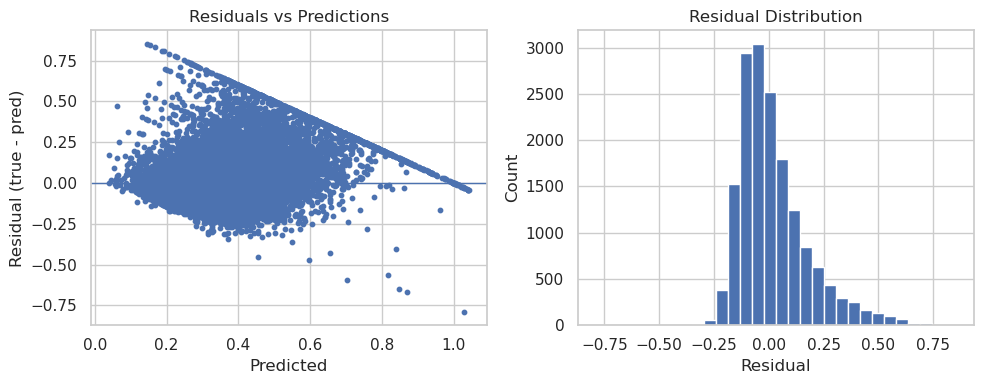

MLP (test)
----------
RMSE: 0.16279
MAE : 0.11932
R²  : 0.54818


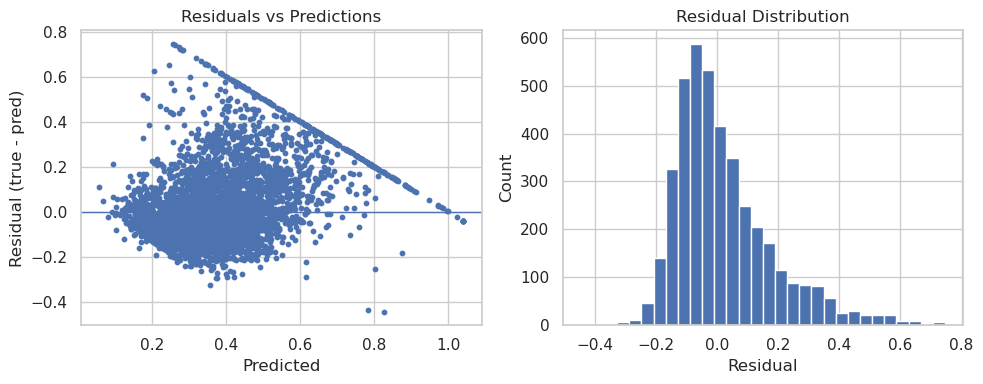

(0.16279070576437826, 0.11932404521464511, 0.5481787741317946)

In [29]:
# ---- TRAIN predictions ----
model.eval()
with torch.no_grad():
    X_train_t = torch.as_tensor(np.asarray(norm_train_x, dtype=np.float32), device=device)
    mlp_y_train_predict = model(X_train_t).cpu().numpy().reshape(-1)

show_results_regression(y_train, mlp_y_train_predict, title="MLP (train)")


# ---- TEST predictions ----
with torch.no_grad():
    X_test_t = torch.as_tensor(np.asarray(norm_test_x, dtype=np.float32), device=device)
    mlp_y_test_predict = model(X_test_t).cpu().numpy().reshape(-1)

show_results_regression(y_test, mlp_y_test_predict, title="MLP (test)")

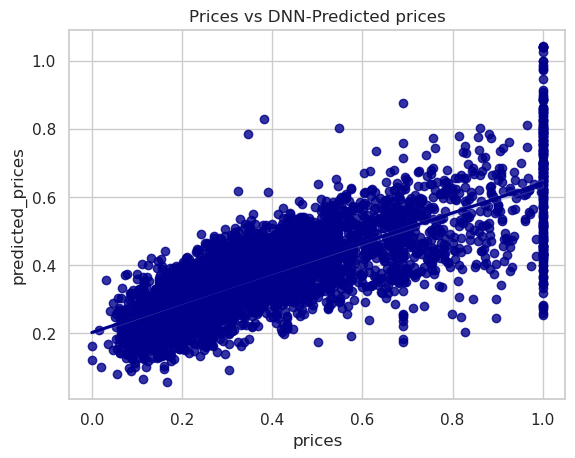

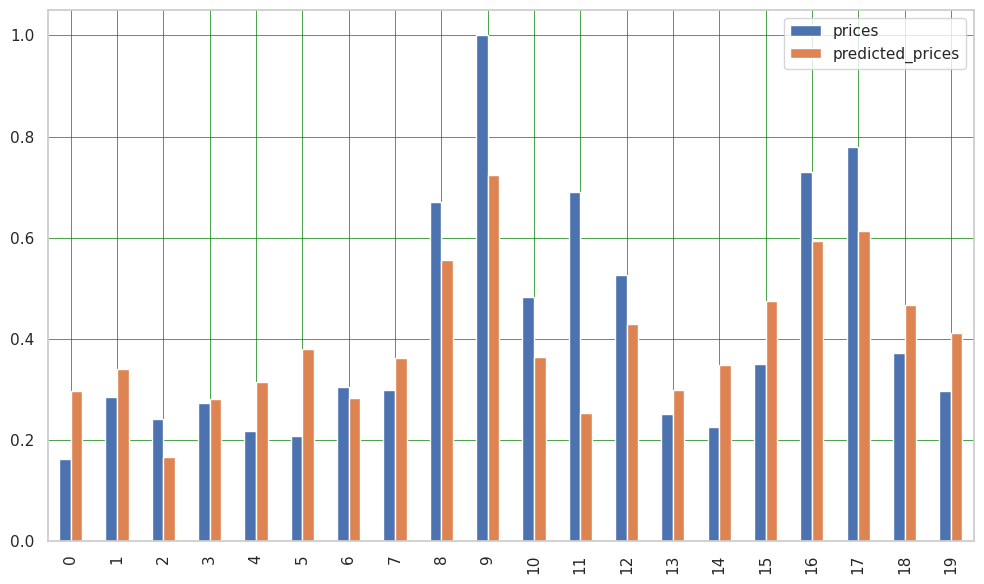

In [30]:
visualize_model_output(y_test, mlp_y_test_predict, 'DNN') #norm_test_y

### LIME

In [31]:
feature_names = ['MedInc','HouseAge','AveRooms','AveBedrms',
                 'Population','AveOccup','Latitude','Longitude']

X_train_lime = norm_train_x[feature_names].to_numpy()
X_test_lime  = norm_test_x[feature_names].to_numpy()

sample_id = 9
instance = norm_test_x.loc[norm_test_x.index[sample_id], feature_names].to_numpy()
print(instance.shape)   # (8,)

(8,)


In [32]:
import lime
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train_lime,
    feature_names=feature_names,
    mode="regression",
    discretize_continuous=True
)

In [34]:
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=svr.predict,
    num_features=len(feature_names)
)

exp.show_in_notebook(show_table=True, show_all=False)

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(


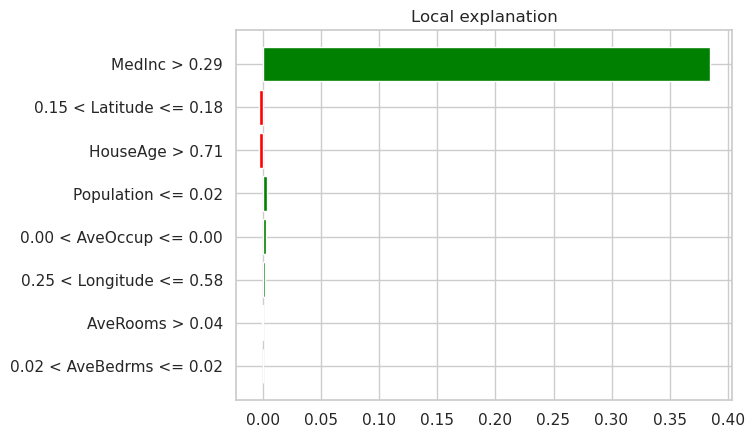

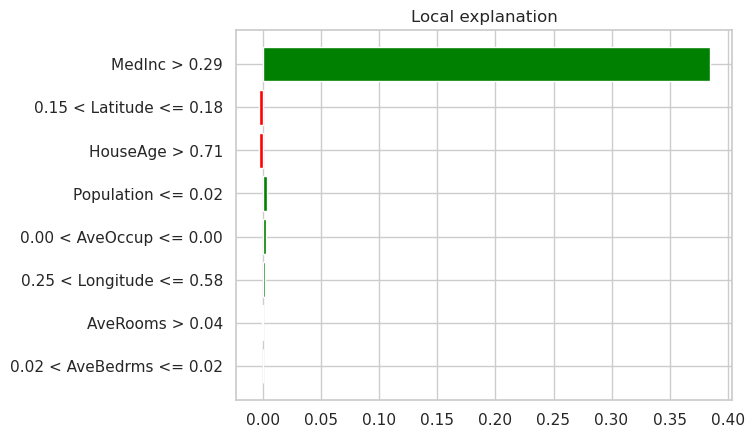

In [35]:
exp.as_pyplot_figure()

In [36]:
def torch_predict_fn(x):
    """
    x: numpy array of shape (n_samples, n_features)
    returns: numpy array of shape (n_samples,)
    """
    x = np.asarray(x, dtype=np.float32)
    x_t = torch.from_numpy(x).to(device)

    model.eval()
    with torch.no_grad():
        yhat = model(x_t).detach().cpu().numpy()

    return yhat.reshape(-1)   # LIME expects 1D for regression


exp = explainer.explain_instance(
    data_row=instance,              # shape (8,)
    predict_fn=torch_predict_fn,    # wrapper, not model.predict
    num_features=len(feature_names)
)

exp.show_in_notebook(show_table=True, show_all=False)

### SHAP



In [37]:
import shap
shap.initjs()

In [38]:
background = X_train.sample(200, random_state=0).to_numpy()

def predict_fn(X):
    X = np.asarray(X)
    return svr.predict(X)

explainer = shap.KernelExplainer(predict_fn, background)

sample_id = 9
x = X_test.iloc[[sample_id]].to_numpy()   # keep 2D

shap_values = explainer.shap_values(x, nsamples=200)  

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(
Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(


In [39]:
# Visuals
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x, feature_names=X_test.columns)

In [ ]:
global_shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], global_shap_values[0], X_test)

  0%|          | 0/4128 [00:00<?, ?it/s]

/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(
/gpfs/opt/sw/jupyterhub/envs/conda/vsc5/jupyterhub-huggingface-v2/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SelectFromModel was fitted with feature names
  warnings.warn(


# Conclusions

1. The dataset contains strong linear structure with moderate nonlinear interactions.
2. Median income is the dominant driver of housing prices.
3. Spatial features introduce nonlinear regional effects.
4. Neural networks can be effectively interpreted with SHAP and ALE.
5. For regression tasks with correlated features:
   - Prefer ALE over PDP.
   - Use SHAP for consistent additive explanations.
   - Use ICE to inspect local heterogeneity.
   - Use LIME cautiously for individual explanations.

---

# Practical Takeaways for Regression XAI

- Ensure explainer feature space matches model feature space.
- Use both global and local explanation methods.
- Consider feature correlation before interpreting PDP.
- Validate explanation stability across models.
- Interpret magnitude relative to target scaling.
